# Problem 1: Bayes Classifier

Bayes classifiers fall under the class of **generative classifiers**. Generative classifiers attempt to learn the generation process of a dataset, usually by making some assumptions about the process that generates the data. Then such classifiers use the learned model to make a prediction or classify the unseen data. A simple example is a Naïve Bayes Classifier.

### Naïve Bayes classifier
Consider a dataset $\left\{X^{(i)}, Y^{(i)}\right\}_{i=1}^{m}$. Each $X^{(i)}$ is an $n-$dimensional vector of input features. Let $Y^{(i)} \in \{0,1\}$ denote the class to which $X^{(i)}$ belongs (this can be easily extended to multi-class problems as well). A good classifier has to accurately predict the probability that any given input $X$ falls in class $1$ which is $ P(Y=1 | X)$. 

Recall Bayes theorem,

\begin{align}
P(Y|X) &= \frac{P(X|Y)P(Y)}{P(X)} \\
       &= \frac{P(X_1, X_2, \dots, X_n | Y)P(Y)}{P(X_1, X_2, \dots, X_n)}\\
\end{align}

**We use the assumption that features are independent of each other. That is one particular feature does not affect any other feature. Of course these assumptions of independence are rarely true, which is why the model is referred as the "Naïve Bayes" model. However, in practice, Naïve Bayes models have performed surprisingly well even on complex tasks, where it is clear that the strong independence assumptions are false.**

The independence assumption reduces the conditional probability expression to
\begin{align}
P(Y|X) &= \frac{P(X_1 | Y)P(X_2 | Y) \dots P(X_n | Y)P(Y)}{P(X_1)P(X_2)\dots P(X_n)}\\
\end{align}

The terms $P(X_i|Y)$ and $P(X_i)$ can be easily estimated/learned from the dataset. Hence, the value of $P(Y|X)$ can be found for each value of $Y$. Finally, the class to which $X$ belongs is estimated as $arg\max_{Y}P(Y|X)$. Moreover since $X$ is independent of $Y$, it is only required to find $arg\max_{Y}P(X|Y)P(Y).$ For better understanding with an example refer [this](https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c) article.


### Problem statement and Dataset
In this problem, you would implement, train and test a Naïve Bayes model to learn to classify sentiment (positive/negative) of a given text. The training data is in `all_sentiment_shuffled.txt` file.  You can use the function given below to read the dataset


In [ ]:
def read_corpus(corpus_file):
    """ This function reads the file in the location specified by string 
    `corpus_file` and returns a list of tuples (list of words in text, label)
    """
    out = []
    with open(corpus_file) as f:
        for line in f:
            tokens = line.strip().split()
            out.append((tokens[3:], tokens[1]))
    return out

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
corpus = read_corpus('/content/drive/MyDrive/Colab Notebooks/all_sentiment_shuffled.txt')
print("Example:\n", " Text: ", corpus[0][0], "\n  Label: ", corpus[0][1])
print("Total number of documents =", len(corpus))

Example:
  Text:  ['i', 'bought', 'this', 'album', 'because', 'i', 'loved', 'the', 'title', 'song', '.', 'it', "'s", 'such', 'a', 'great', 'song', ',', 'how', 'bad', 'can', 'the', 'rest', 'of', 'the', 'album', 'be', ',', 'right', '?', 'well', ',', 'the', 'rest', 'of', 'the', 'songs', 'are', 'just', 'filler', 'and', 'are', "n't", 'worth', 'the', 'money', 'i', 'paid', 'for', 'this', '.', 'it', "'s", 'either', 'shameless', 'bubblegum', 'or', 'oversentimentalized', 'depressing', 'tripe', '.', 'kenny', 'chesney', 'is', 'a', 'popular', 'artist', 'and', 'as', 'a', 'result', 'he', 'is', 'in', 'the', 'cookie', 'cutter', 'category', 'of', 'the', 'nashville', 'music', 'scene', '.', 'he', "'s", 'gotta', 'pump', 'out', 'the', 'albums', 'so', 'the', 'record', 'company', 'can', 'keep', 'lining', 'their', 'pockets', 'while', 'the', 'suckers', 'out', 'there', 'keep', 'buying', 'this', 'garbage', 'to', 'perpetuate', 'more', 'garbage', 'coming', 'out', 'of', 'that', 'town', '.', 'i', "'ll", 'get', 'down'

### Preprocessing a text document
We can guess that not all the words in a document will be helpful in classification. The words such as "a", "the", "is", etc appear in all the documents randomly and can be neglected or removed. Also a same word can be written in different tenses while conveying the same mood (example "rot"/"rotten"). Hence the documents need to be preprocessed before using them for training the classifier.

 Libraries such as `gensim`, `nltk` contain functions for doing these preprocessing steps, and you are welcome to use such functions in your code. Formally, these are the preprocessings to be done to the input text to make them simpler and which can improve the performance of your model as well.
* **Tokenization**: 
    1.   Split the text into sentences and the sentences into words
    2.   Lowercase the words and remove punctuation
* Remove all **stopwords** (stopwords are commonly used word such as "the", "a", "an", "in")
* Remove all words that have fewer than 3 characters.
* **Lemmatize** the document (words in third person are changed to first person, and verbs in past and future tenses are changed into present).


In [ ]:
#Importing Libraries Required For Preprocessing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
""" Implement preprocessing functions here. Use the python modules named above 
for implementing the functions. 
"""

# Removes all the punctuations present in the document
def remove_punctuation(doc):
    # implement
    punct = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    no_punct=''
    word_tokens = word_tokenize(doc)
    for w in word_tokens:
      if w not in punct:
          if len(w)>2:
            no_punct += w + ' '
    return no_punct
    # comment the next line out
    # pass

# Removes words like 'if', 'he', 'she', 'the', etc which never belongs to any topic
def remove_stopwords(doc):
    # implement
    stop_w = set(stopwords.words('english'))
    word_tokens = word_tokenize(doc)
    filtered_doc = word_tokens[:3]
    filter_doc = [w for w in word_tokens[3:] if not w in stop_w]
    filtered_doc.extend(filter_doc)
    
    return filtered_doc
    # comment the next line out
    # pass

# lemmatizer is a transformers which transforms the word to its singular, present-tense form
def lemmatize(doc):
    # implement
    lemmat = WordNetLemmatizer()

    # word_list = word_tokenize(doc)
    lemmatized_output = ' '.join(doc[0:3]) +' ' + ' '.join([lemmat.lemmatize(w) for w in doc[3:]])
    return lemmatized_output
    # comment the next line out
    # pass

def preprocess(doc):
    """ Function to preprocess a single document
    """
    assert isinstance(doc, str) # assert that input is a document and not the corpus
    processed_doc = remove_punctuation(doc)
    processed_doc = remove_stopwords(processed_doc)
    processed_doc = lemmatize(processed_doc)
    return processed_doc

### Implementation of Naïve Bayes 

You can refer the Naïve Bayes section in [this](https://web.stanford.edu/~jurafsky/slp3/slides/7_NB.pdf) slides (slide #32 has a simple pseudo code) to get a hint about implementation of Naïve Bayes for text classification. Then complete the following functions `train_nb` and `classify_nb`.

NOTE: If you multiply many small probabilities you may run into problems with numeric precision: the probability becomes zero. To handle this problem, it is recommended that you compute the logarithms of the probabilities instead of the probabilities.

In [ ]:
import math as m
import tqdm.notebook as tq

Py1 = 0
Py0 = 0
nw = 0
nw_1 = 0
nw_2 = 0
list_1 = []
list_0 = []


def train_nb(training_documents):
    # return the data you need to classify new instances
    global Py1
    global Py0
    global nw
    global nw_1
    global nw_0
    global list_1
    global list_0
    corpus_t = read_corpus(training_documents)
    #Calculating the probabilties of the classes and also the P(word|Class).
    for i in corpus_t:
      if i[1] == 'pos':
        Py1 += 1/len(corpus_t)
        list_1.extend(i[0])
      elif i[1] == 'neg':
        list_0.extend(i[0])
    nw_1 = len(list_1)
    nw_0 = len(list_0)
    nw = len(set(list_1))+len(set(list_0))

    Py0 = 1-Py1
  
    # pass

def classify_nb(training_documents):
    # return the guess of the classifier
    corpus_c = read_corpus(training_documents)
    true = 0
    false = 0
    alp = 1
    #Comparing the probabilties.
    for i in tq.tqdm(corpus_c):
      log_prob_1 = m.log(Py1,10)
      log_prob_0 = m.log(Py0,10)
      # if true+false <200:
        # Adding logarithm of Probabilities
      for j in i[0]:
        log_prob_1 += m.log(list_1.count(j)+alp,10) - m.log(nw_1 + alp*nw,10)
        log_prob_0 += m.log(list_0.count(j)+alp,10) - m.log(nw_0 + alp*nw,10)
      if log_prob_1 >= log_prob_0:
        if i[1] == "pos":
          true += 1
        else:
          false += 1 
      else:
        if i[1] == "neg":
          true += 1
        else:
          false += 1 
      # else:
      #   break

    print("\ncorrect --> ",true)
    print("wrong   --> ",false)

    # comment the next line out
    # pass

### Train-test split
After reading the dataset, you must split the dataset into training ($80\%$) and test data ($20\%$). Use training data to train the Naïve Bayes classifier and use test data to check the accuracy.

In [ ]:
doc_up = '/content/drive/MyDrive/Colab Notebooks/all_sentiment_shuffled.txt'
doc_p = []
with open(doc_up) as f:
  for line in f:
    doc_p.append((preprocess(line.strip())))

In [ ]:
import random
doc_r = list(doc_p)
random.shuffle(doc_r)
doc_t = doc_r[:int(11914*0.8)]
doc_c = doc_r[int(11914*0.8):]
with open('/content/drive/MyDrive/Colab Notebooks/training_doc.txt','w') as t:
  for item in doc_t:
    t.write("%s\n" % item)

with open('/content/drive/MyDrive/Colab Notebooks/class_doc.txt','w') as c:
  for item in doc_c:
    c.write("%s\n" % item)


In [ ]:
train_nb('/content/drive/MyDrive/Colab Notebooks/training_doc.txt')
classify_nb('/content/drive/MyDrive/Colab Notebooks/class_doc.txt')



correct -->  1884
wrong   -->  499


In [ ]:
Accuracy = 1884/(449+1884)
Accuracy

0.8075439348478354

### Comparison (Bonus)
Also use `sklearn`'s Naïve Bayes classifier and compare its performance with the classifier you implemented. 

In [ ]:
from sklearn.naivebayes import MultiomialNB


Make sure your code is well documented with comments explaining everything done in your algorithm. With this being said, you are free to design your code anyway you like as long as it implements a Naïve Bayes model and is easily understandable. If you digress from the given code template, explain briefly the structure of your code as well.

# Problem 2: Regularization and bias-variance trade-off


### Problem statement
In this question we will see how regularization can be used to prevent overfitting of data and then observe the bias-variance tradeoff in a practical setting.

### Dataset generation
- Generate 10 data points $f(x)=sin(2\pi x)$ where $x \hspace{0.1cm} \epsilon \hspace{0.1cm} [0, 1]$ is sampled uniformly.
- Add Gaussian noise $N(0, 0.5)$ to the generated data. By generating data in this way, we are capturing a property of many real data sets - namely, that they possess an underlying regularity $f(x)$, which we wish to learn, but that individual observations are corrupted by random noise $N(0,0.5)$.
- We will now use this set of 10 data points as the training dataset.

In [ ]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

x = np.linspace(0,1,10,True)
y_org = np.sin(2*m.pi*x)
y = np.sin(2*m.pi*x) + np.random.normal(0,np.sqrt(0.5),10)

### Polynomial curve fitting 
- Fit 5 polynomial regression models with varying polynomial orders $M = \{0, 1, 3, 6, 9\}$ on the training dataset. Use the polynomial function of the form:  $y(x, \textbf{w})=\sum^{M}_{j=0}w_jx^j$ and $L2$ loss as the error function: $E(\textbf{w})= \frac{1}{2}\sum^{N}_{n=1}\{y(x_n, \textbf{w}) - t_n)\}^2$, where $t_n$ is the true output for the input $x_n$, and $N$ is the total number of training points.
- For each model: $M = \{0, 1, 3, 6, 9\}$, plot the graph of the function obtained from fitting the model onto the training dataset along with the training dataset points. 
- Report the mean squared error on the training dataset and explain its trend with increasing model complexity. Comment on overfitting and underfitting.
- For each model: $M = \{0, 1, 3, 6, 9\}$, report the coefficients $\textbf{w}^*$. Explain the trend in the coefficients with increasing model complexity. 
- The goal here is to achieve good generalization by making
accurate predictions for new data, and not the training data. Use the data generation procedure used previously to generate 100 data points but with new choices for the random noise values included in the target values. These 100 data points will now form our validation dataset.
- Evaluate each model: $M = \{0, 1, 3, 6, 9\}$ on the validation set and report the mean squared error for each model. 
- Plot the training and validation set mean squared errors for models with $M = \{0, 1, 3, 6, 9\}$ on the same graph. Explain the trend in the error values with increasing model complexity.

In [ ]:
# Fitting polynomials to the data
M = [0,1,3,6,9]
yfit = [np.zeros(10)]*5
deg = []
for i in range(len(M)):
  deg.append(np.polyfit(x,y,M[i]))
  poly = np.poly1d(deg[i])
  yfit[i] = poly(x)

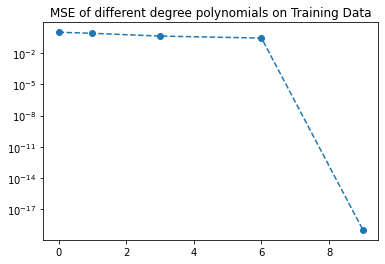

In [ ]:
#Calculating Mean Square Error on the Training Data
from sklearn.metrics import mean_squared_error
mse=[]
for i in range(len(M)):
  mse.append((mean_squared_error(y, yfit[i])))
plt.figure()
plt.plot(M,mse,marker='o', linestyle='dashed')
plt.title('MSE of different degree polynomials on Training Data')
#Plotting on Log Scale
plt.yscale('log')


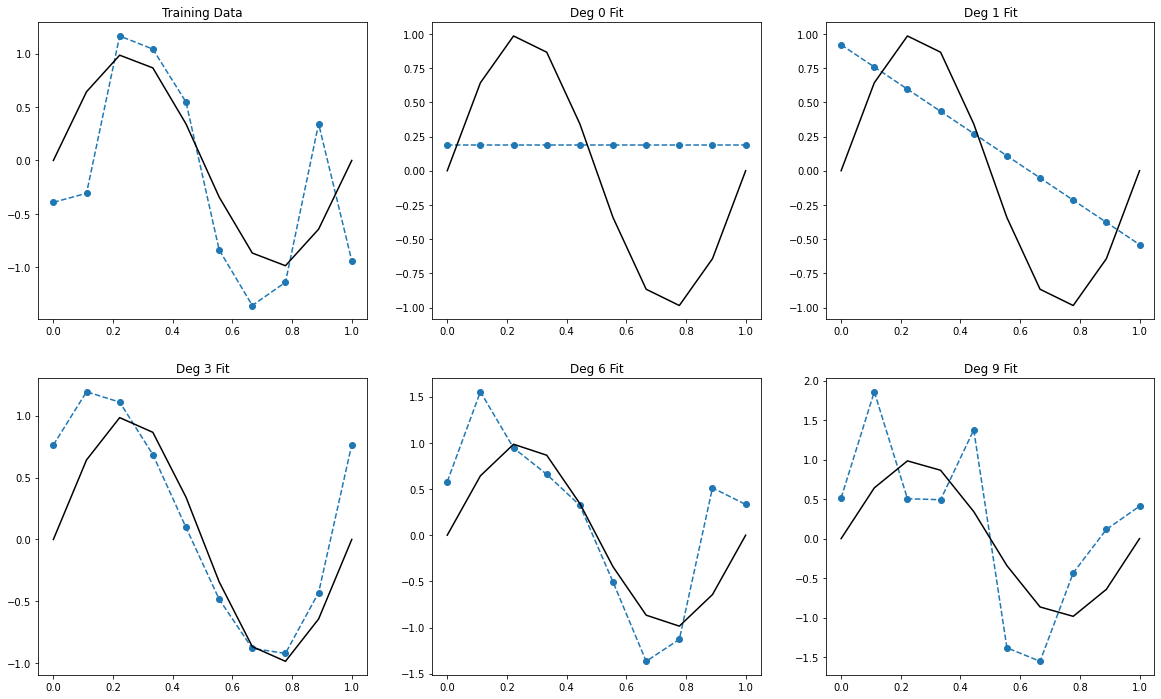

In [ ]:
ax=[]
f = plt.figure(figsize=(20,12))
ax.append(f.add_subplot(2,3,1))
ax[0].plot(x,y,marker='o', linestyle='dashed')
ax[0].plot(x,y_org,'k-')
ax[0].set_title('Training Data')

for i in range(len(M)):
  ax.append(f.add_subplot(2,3,i+2))
  ax[i+1].plot(x,yfit[i],marker='o', linestyle='dashed')
  ax[i+1].plot(x,y_org,'k-')
  ax[i+1].set_title('Deg %d Fit'%M[i])

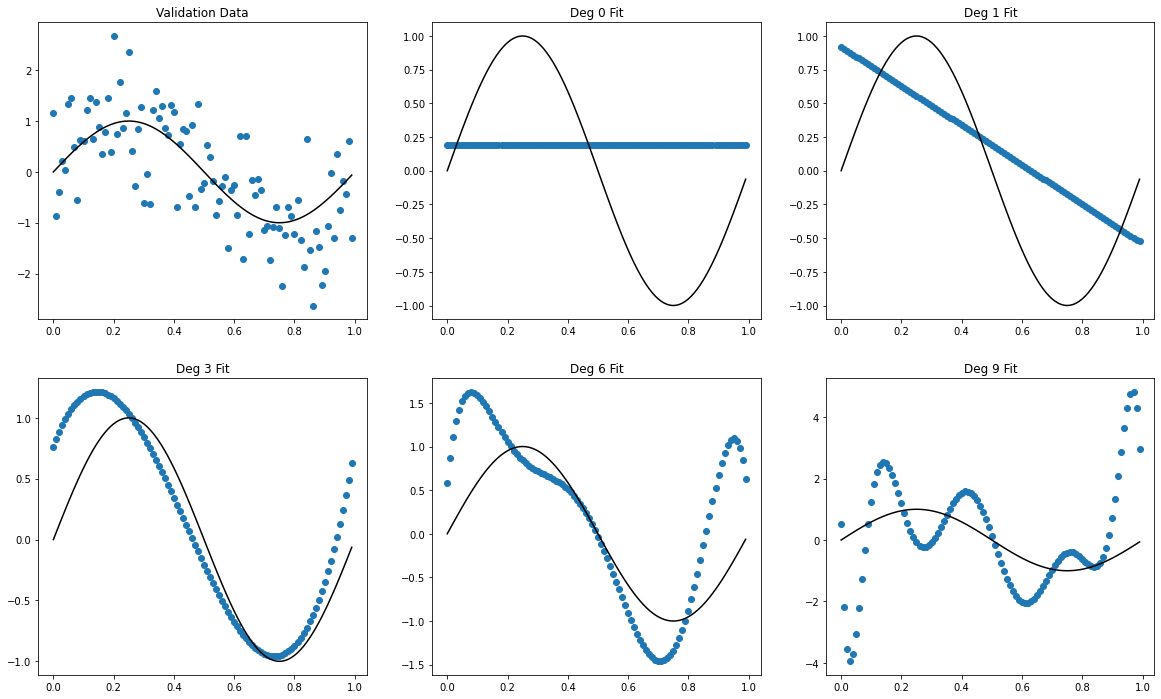

In [ ]:
x_v = np.linspace(0,1,100,False)
y_org_v = np.sin(2*m.pi*x_v)
y_v = np.sin(2*m.pi*x_v) + np.random.normal(0,np.sqrt(0.5),100)
yfit_v = [np.zeros(100)]*5

ax=[]
f = plt.figure(figsize=(20,12))
ax.append(f.add_subplot(2,3,1))
ax[0].scatter(x_v,y_v)
ax[0].plot(x_v,y_org_v,'k-')
ax[0].set_title('Validation Data')

for i in range(len(M)):
  poly = np.poly1d(deg[i])
  yfit_v[i] = poly(x_v)
  ax.append(f.add_subplot(2,3,i+2))
  ax[i+1].scatter(x_v,yfit_v[i])
  ax[i+1].plot(x_v,y_org_v,'k-')
  ax[i+1].set_title('Deg %d Fit'%M[i])

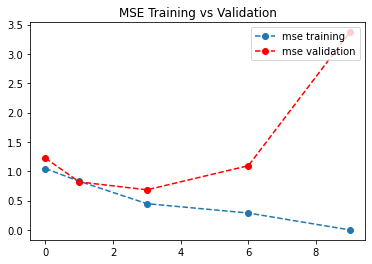

In [ ]:
mse_v=[]
for i in range(len(M)):
  mse_v.append((mean_squared_error(y_v, yfit_v[i])))
plt.figure()
plt.plot(M,mse,marker='o', linestyle='dashed',label='mse training')
plt.plot(M,mse_v,marker='o', linestyle='dashed',color='r',label='mse validation');
plt.legend(loc='upper right');
plt.title('MSE Training vs Validation');
# plt.yscale('log')

**Explainantion** : For lower degrees we tend to underfit and thus when we test the polynomials on the vaidation data we get high mean squared error. Similarly if we use higher degree polynomial we tend to overfit and so we get higher mean squared error with increasing degree. If we strike a balance between bias and overfitting (In this case degree between 1 and 3 polynomial), we get minimum mean squared error among other degree polynomials.

### Regularization

We've seen the effects of increasing model complexity on the training error and the validation error above. We will now use L2 regularization to reduce overfitting.

- Fit a polynomial regression model of order $M=9$ to the same training dataset as before but now using the regularized error function given by $E^{'}(\textbf{w})= \frac{1}{2}\sum^{N}_{n=1}\{y(x_n, \textbf{w}) - t_n)\}^2 + \frac{\lambda}{2}{\|\textbf{w}\|}^2$ where $\lambda$ is the regularization hyperparameter. Use the following values for $\lambda$: $\lambda={0.01, 0.1, 1}$.
- Report the coefficients of the model fit above for $\lambda={0.01, 0.1, 1}$. Explain the trend in the coefficient values with increasing $\lambda$.
- Find the optimal value of the hyperparameter $\lambda$. 
- Compare the validation error results of the following two models : polynomial regression model of order $M=9$ without regularization and polynomial regression model of order $M=9$ with regularization hyperparameter as estimated above.

Coefficients for lambda = 0.01
 [ 0.02558161  2.77144141 -5.32401728 -2.65015539  0.77295154  2.54384734
  2.63718412  1.5275612  -0.32602851 -2.58198927]
Coefficients for lambda = 0.1
 [ 0.23490977  0.04486082 -1.12319159 -0.72953461 -0.18467579  0.17403286
  0.32704591  0.32509597  0.22125441  0.05639568]
Coefficients for lambda = 1
 [ 0.11280952 -0.21939048 -0.31273798 -0.22352795 -0.12355426 -0.05061673
 -0.00582493  0.01742911  0.025818    0.02449921]


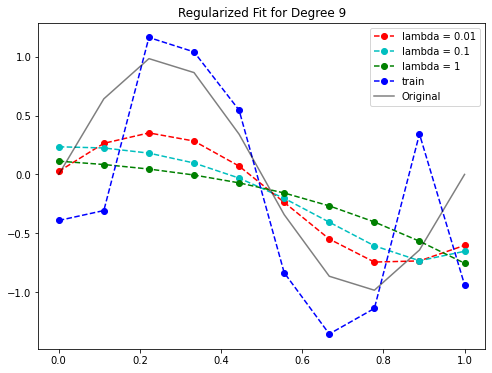

In [ ]:
lam = [0.01,0.1,1]
col=['r','c','g']
poly_deg = 9
N=10
W=np.zeros(shape=(3,poly_deg+1))

# <<Took help from https://www.kaggle.com/elyas19/implementing-polynomial-ridge-regression>>
Q_train = np.zeros(shape = (N,poly_deg+1))
for i in range(poly_deg+1):
    Q_train[:,i] = np.power(x,i).reshape((N,))    

plt.figure(figsize=(8,6))
for j in range(len(lam)):
  # Finding the coefficents of polynomials for varying lambda
  W[j] = np.linalg.pinv((Q_train.T.dot(Q_train) + lam[j]*np.eye(poly_deg+1))).dot(Q_train.T).dot(y)
  print('Coefficients for lambda = %s\n'%lam[j],W[j])
  plt.plot(x,Q_train.dot(W[j]),col[j],marker='o',linestyle='dashed',label='lambda = %s'%lam[j])
plt.plot(x,y,'b',marker='o',linestyle='dashed',label='train');
plt.plot(x,y_org,color='black',alpha=0.5,label='Original');
plt.title('Regularized Fit for Degree 9')
plt.legend(loc='upper right');



**Explaination** : With increasing lambda we get a polynomial which has lesser complexity. This means that the weights of higher degrees are reduced resulting in reduced sudden variations in the curve.

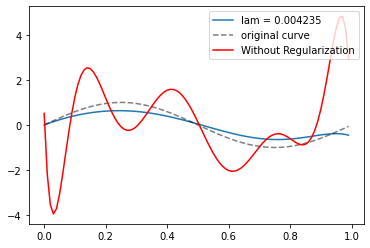

In [ ]:
from scipy.optimize import minimize_scalar
N_v=100

Q_train_v = np.zeros(shape = (N_v,poly_deg+1))
for i in range(1,poly_deg+1):
    Q_train_v[:,i] = np.power(x_v,i).reshape((N_v,))

# Finding Optimal Lambda    
def myfunc(lam):
  W = np.linalg.pinv((Q_train.T.dot(Q_train) + lam*np.eye(poly_deg+1))).dot(Q_train.T).dot(y)
  return mean_squared_error(y_v, Q_train_v.dot(W))

lam_opt = minimize_scalar(myfunc)['x']
min_mse = minimize_scalar(myfunc)['fun']
W_opt = np.linalg.pinv((Q_train.T.dot(Q_train) + lam_opt*np.eye(poly_deg+1))).dot(Q_train.T).dot(y)


plt.figure()
plt.plot(x_v,Q_train_v.dot(W_opt),label='lam = %f'%lam_opt)
plt.plot(x_v,np.sin(2*np.pi*x_v),color='black',linestyle='dashed',label='original curve',alpha=0.5)
# plt.plot(x_v,y_v,color='purple',label='Noisy Curve')
plt.plot(x_v,yfit_v[4],color='red',label='Without Regularization')
plt.legend(loc='upper right');

In [ ]:
# mse_reg=[]
# for i in range(len(lam)):
#   mse_reg.append((mean_squared_error(y_v, Q_train_v.dot(W[i]))))
print('Optimised Lamda = %f'%lam_opt)
print('Min MSE with Regularization = ',min_mse)
print('MSE without Regularization = ',mse_v[4])
# plt.figure()
# plt.plot(lam,mse_reg,linestyle='dashed',marker='o');
# plt.plot(lam,[mse_v[4],mse_v[4],mse_v[4]]);

Optimised Lamda = 0.004235
Min MSE with Regularization =  0.6551705701051849
MSE without Regularization =  3.3684906893305464


### Bias-variance trade-off:

In class you have seen that the expected prediction error for any model can be decomposed as the sum of $bias^2, variance$ and $irreducible\,noise$. We will now observe the bias-variance trade-off for a polynomial regression model of order $M=9$ with varying regularization hyperparameter.
- Generate $50$ datasets, each containing $10$ points, independently, from the curve $f(x)=sin(2\pi x)$. Add gaussian noise $N(0,0.5)$ to each data point.
- Fit a polynomial regression model of order $M=9$ to each training dataset by minimizing the regularized error function $E^{'}(\textbf{w})$ with $\lambda=1$.
- Plot the following:
  - function obtained by training the model on each of the 50 datasets in the same figure.
  - The corresponding average of the 50 fits and the sinusoidal function from which the datasets were generated in the same figure.
- Repeat this exercise for two more $\lambda$ values: $\lambda$ = 0.1, 10.
- Based on the plots obtained, explain the trend in the bias and variance values with increasing model complexity.
- Bonus (optional and will not be graded) : 
  - Plot the $bias^2$, $variance$  and $bias^2 + variance$ against $\lambda$.
  - Also plot the average test error on a test data size of 1000 points (generated in a similiar way as the 50 training datasets, but independently) against $\lambda$ on the same figure.
  - For your reference: 
$$
Bias^2= (E_{D}[\hat f(x)] - f(x))^2
\\
Variance = E_{D}[(\hat f(x) - E_{D}[\hat f(x)])^2]
$$
Here $\hat f$ is the trained model and $D$ is the set of all datasets. Use the $50$ training datasets to compute the empirical estimations.

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
poly_deg=9
lam = [0.01,0.1,1]

def sine(x):
  return np.sin(2*np.pi*x)
x_x = np.linspace(0,1,500,True)
x_s = [np.zeros(10)]*50
#Genrating 50 datasets
x_s =np.random.choice(x_x,size=(50,10))
#Arranging in ascending order
for i in range(50):
  x_s[i]=np.sort(x_s[i])
y_s = [np.zeros(10)]*50
y_s = np.sin(2*np.pi*x_s)+np.random.normal(0,np.sqrt(0.5),(50,10))
print(x_s[1])

[0.06012024 0.11823647 0.12825651 0.15631263 0.19438878 0.44088176
 0.46492986 0.60521042 0.71743487 0.84168337]


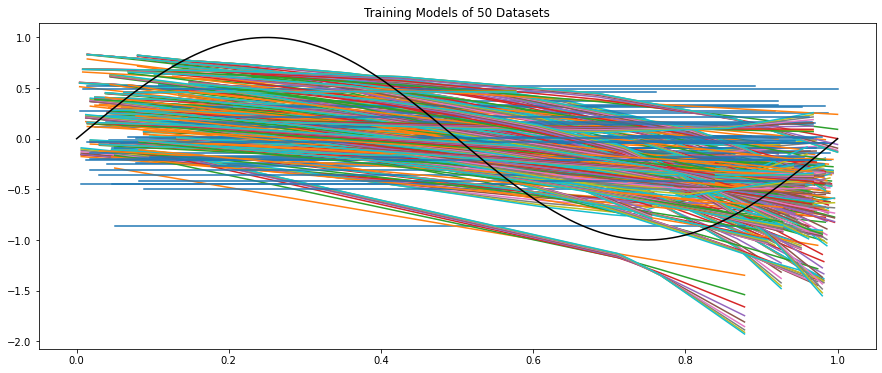

In [ ]:
#Fitting for 50 datasets
W_s =np.zeros(shape=(50,poly_deg+1))
W_s_avg = np.zeros(poly_deg+1)
plt.figure(figsize=(15,6))
N = 10
Q_train_x = np.zeros(shape = (500,poly_deg+1))
for i in range(50):
  Q_train_s = np.zeros(shape = (N,poly_deg+1))
  for j in range(poly_deg+1):
      Q_train_s[:,j] = np.power(x_s[i],j).reshape((N,)) 
      W_s[i] =np.linalg.pinv((Q_train_s.T.dot(Q_train_s) + lam[2]*np.eye(poly_deg+1))).dot(Q_train_s.T).dot(y_s[i])
      plt.plot(x_s[i],Q_train_s.dot(W_s[i]))
      W_s_avg += W_s[i]/50
plt.title('Training Models of 50 Datasets')
plt.plot(x_x,sine(x_x),color='black');

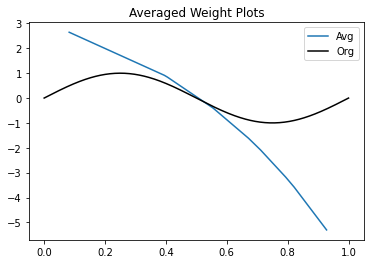

In [ ]:
plt.figure()
plt.plot(x_s[49],Q_train_s.dot(W_s_avg),label='Avg')
plt.title('Averaged Weight Plots')
plt.plot(x_x,sine(x_x),color='black',label='Org');
plt.legend(loc='upper right');


In [ ]:
#Repeating for other lambdas
#Lambda = 0.1
W_s_1 =np.zeros(shape=(50,poly_deg+1))
W_s_avg_1 = np.zeros(poly_deg+1)
for i in range(50):
  Q_train_s = np.zeros(shape = (N,poly_deg+1))
  for j in range(poly_deg+1):
      Q_train_s[:,j] = np.power(x_s[i],j).reshape((N,)) 
      W_s_1[i] =np.linalg.pinv((Q_train_s.T.dot(Q_train_s) + lam[1]*np.eye(poly_deg+1))).dot(Q_train_s.T).dot(y_s[i])
      W_s_avg_1 += W_s_1[i]/50
#Lambda =10
W_s_2 =np.zeros(shape=(50,poly_deg+1))
W_s_avg_2 = np.zeros(poly_deg+1)
for i in range(50):
  Q_train_s = np.zeros(shape = (N,poly_deg+1))
  for j in range(poly_deg+1):
      Q_train_s[:,j] = np.power(x_s[i],j).reshape((N,)) 
      W_s_2[i] =np.linalg.pinv((Q_train_s.T.dot(Q_train_s) + 10*np.eye(poly_deg+1))).dot(Q_train_s.T).dot(y_s[i])
      W_s_avg_2 += W_s_1[i]/50

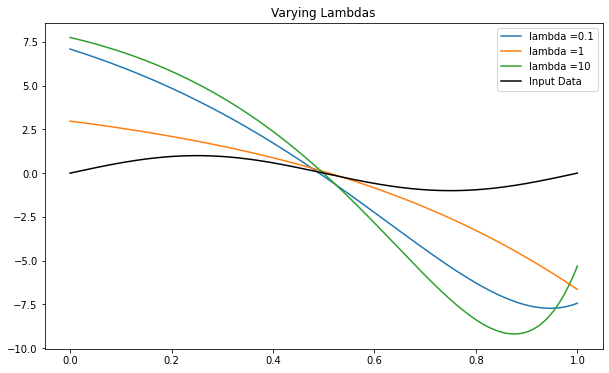

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x_x,Q_train_x.dot(W_s_avg_1),label='lambda =0.1')
plt.plot(x_x,Q_train_x.dot(W_s_avg),label='lambda =1')
plt.plot(x_x,Q_train_x.dot(W_s_avg_2),label='lambda =10')
plt.plot(x_x,sine(x_x),color='black',label='Input Data')
plt.title('Varying Lambdas')
plt.legend(loc='upper right');

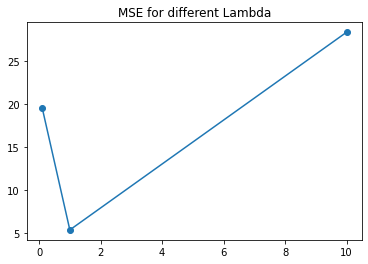

In [ ]:
mse_s = np.zeros(3)
mse_s[0]= mean_squared_error(sine(x_x),Q_train_x.dot(W_s_avg_1))
mse_s[1]= mean_squared_error(sine(x_x),Q_train_x.dot(W_s_avg))
mse_s[2]= mean_squared_error(sine(x_x),Q_train_x.dot(W_s_avg_2))
plt.plot([0.1,1,10],mse_s,marker='o');
plt.title('MSE for different Lambda');

**Explaination :** We can observe that MSE decreases initially and then increases with increasing lambda. This is because for lower lambda, we tend to overfit the data(due to not large enough regularisation term) and for higher lambda, we have very high bias. 

#Problem 3: Logistic Regression

## Binary Logistic Regression

Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the logistic **sigmoid function** $h_ \theta (\cdot)$ to return a probability value which can then be mapped to two or more discrete classes. $$ h_ \theta (x) =  \frac{\mathrm{1} }{\mathrm{1} + e^{- \theta^Tx} }  $$ 

<br>here, the vector $\theta$ represents the weights and the vector $x$ represents the given inputs.


## Problem 3, Part A: Dataset A



Use Dataset A (``data_prob3_parta.csv``) for this part of the question. The given CSV file has three columns: column 1 is the first input feature, column 2 is the second input feature and column 3 is the output label. Split the dataset into training data (75%) and testing data (25%) randomly.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

#Importing the data
csv_a = '/content/drive/MyDrive/Colab Notebooks/data_prob3_parta.csv'
with open(csv_a) as f:
  df_a = pd.read_csv(csv_a,sep=',',header=None)
df_a = df_a.drop(0).reset_index(drop=True).astype(float).rename(columns ={0:'Input 1',1:'Input 2',2:'Output'})
df_a

,Input 1,Input 2,Output
0,25.30,20.6,1.0
1,8.41,53.0,0.0
2,15.80,61.3,0.0
3,32.00,31.7,1.0
4,17.60,80.0,0.0
...,...,...,...
1495,21.80,13.8,1.0
1496,32.90,20.7,1.0
1497,27.40,16.2,1.0
1498,21.60,15.4,1.0


In [ ]:
split = np.random.rand(len(df_a)) < 0.75
train_a = df_a[split]
test_a = df_a[~split]

In [ ]:
# Train-Test Split
traindata_a = train_a.to_numpy(dtype='float32')
testdata_a = test_a.to_numpy(dtype='float32')

In [ ]:
# data_a = df_a.to_numpy(dtype='float32')
# Xa_train, Xa_test, ya_train, ya_test = train_test_split(data_a[:,0:2],data_a[:,2], test_size=0.25 , random_state=42)
# Xa_train

Visualize the training data with a scatter plot (input feature 1 on the X axis, input feature 2 on the Y axis and color the points according to their labels).

In [ ]:
# index1 = [i for i in range(len(ya_train)) if ya_train[i]==1]
# index0 = [i for i in range(len(ya_train)) if ya_train[i]==0]
# plt.figure(figsize=(10,10))
# plt.scatter(Xa_train[index1,0],Xa_train[index1,1],color='orange',alpha=1)
# plt.scatter(Xa_train[index0,0],Xa_train[index0,1],color='green',alpha=0.5);

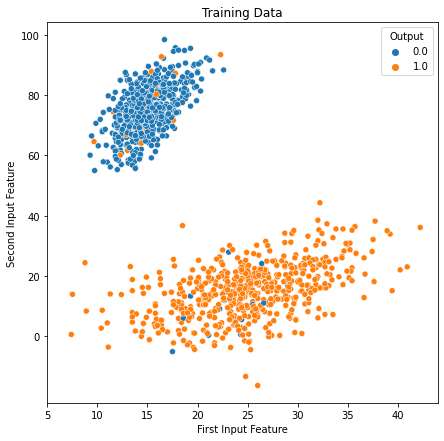

In [ ]:
plt.figure(figsize =(7,7))
p1 = sns.scatterplot(x='Input 1',y='Input 2',hue='Output',data=train_a);
p1.set(xticks=np.arange(5,45,5),yticks=np.arange(0,120,20))
p1.set(xlabel='First Input Feature')
p1.set(ylabel='Second Input Feature')
plt.title('Training Data')
plt.show()

Build the logistic regression model using the training data. 

The scikit library can be used to build the model. Bonus marks will be awarded if the model is built from scratch without using any external libraries. If you are writing your own implementation, try to keep number of features and number of classes as variables for next parts.

In [ ]:
clf = LogisticRegression().fit(traindata_a[:,0:2],traindata_a[:,2])

Print the final weights.

In [ ]:
w_a = clf.coef_[0]
w_a

array([ 0.16247574, -0.08868319])

Print the final accuracy on test data.

In [ ]:
test_a['Pred Output'] = clf.predict(testdata_a[:,0:2]);
clf.score(testdata_a[:,0:2],testdata_a[:,2])

0.9704301075268817

Plot the scatter plot on test data. On top of this scatter plot, plot the decision boundaries.

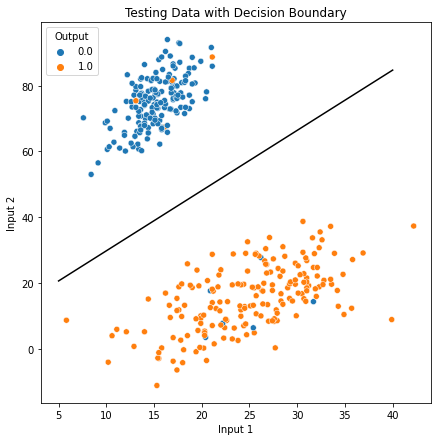

In [ ]:
a = -w_a[0] / w_a[1]
xx = np.arange(5, 45,5)
yy = a * xx - (clf.intercept_[0]) / w_a[1]

plt.figure(figsize = (7,7))
sns.scatterplot(data=test_a,x='Input 1',y='Input 2',hue='Output')
plt.plot(xx, yy, 'k-');
plt.title('Testing Data with Decision Boundary');

## Problem 3, Part B: Dataset B



Use Dataset B (``data_prob3_partb.csv``) for this part of the question. The given CSV file has three columns: column 1 is the first input feature, column 2 is the second input feature and column 3 is the output label. Split the dataset into training data (75%) and testing data (25%) randomly.


In [ ]:
csv_b = '/content/drive/MyDrive/Colab Notebooks/data_prob3_partb.csv'
with open(csv_b) as f:
  df_b = pd.read_csv(csv_b,sep=',',header=None)
df_b = df_b.drop(0).reset_index(drop=True).astype(float).rename(columns ={0:'Input 1',1:'Input 2',2:'Output'})
df_b

,Input 1,Input 2,Output
0,0.95800,-0.575,1.0
1,0.00799,0.140,1.0
2,1.38000,-0.551,1.0
3,-0.36300,0.960,0.0
4,0.46000,0.701,0.0
...,...,...,...
1495,-1.08000,0.290,0.0
1496,-0.82400,0.934,0.0
1497,-0.90000,0.506,0.0
1498,-0.01650,0.385,1.0


Visualize the training data with a scatter plot (input feature 1 on the X axis, input feature 2 on the Y axis and color the points according to their labels).

In [ ]:
split_b = np.random.rand(len(df_b)) < 0.75
train_b = df_b[split_b]
test_b = df_b[~split_b]

In [ ]:
traindata_b = train_b.to_numpy(dtype='float32')
testdata_b = test_b.to_numpy(dtype='float32')

Build the logistic regression model using the training data. The scikit library can be used to build the model. Bonus marks will be awarded if the model is built from scratch without using any external libraries.

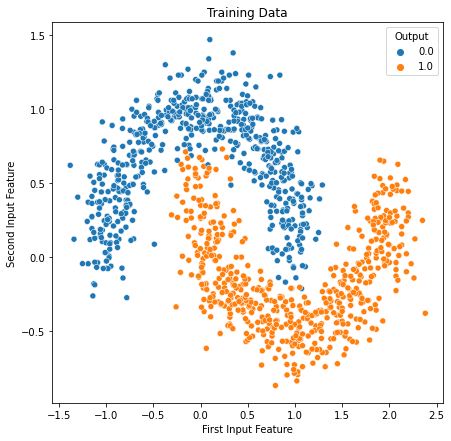

In [ ]:
plt.figure(figsize =(7,7))
p1 = sns.scatterplot(x='Input 1',y='Input 2',hue='Output',data=train_b);
p1.set(xlabel='First Input Feature')
p1.set(ylabel='Second Input Feature')
plt.title('Training Data')
plt.show()

Print the final weights.

In [ ]:
clf_b = LogisticRegression().fit(traindata_b[:,0:2],traindata_b[:,2])
w_b = clf_b.coef_[0]
w_b

array([ 1.21795275, -4.67706099])

Print the final accuracy on test data.

In [ ]:
test_b['Pred Output'] = clf_b.predict(testdata_b[:,0:2]);
test_b

,Input 1,Input 2,Output,Pred Output
2,1.380,-0.5510,1.0,1.0
3,-0.363,0.9600,0.0,0.0
12,0.819,0.6420,0.0,0.0
17,0.876,-0.3310,1.0,1.0
18,-0.827,0.8700,0.0,0.0
...,...,...,...,...
1487,-1.050,0.4410,0.0,0.0
1489,1.940,-0.0118,1.0,1.0
1491,0.159,1.0000,0.0,0.0
1494,1.150,0.1120,0.0,1.0


In [ ]:
#Accuracy
clf_b.score(testdata_b[:,0:2],testdata_b[:,2])

0.8506666666666667

Plot the scatter plot on test data. On top of this scatter plot, plot the decision boundaries.

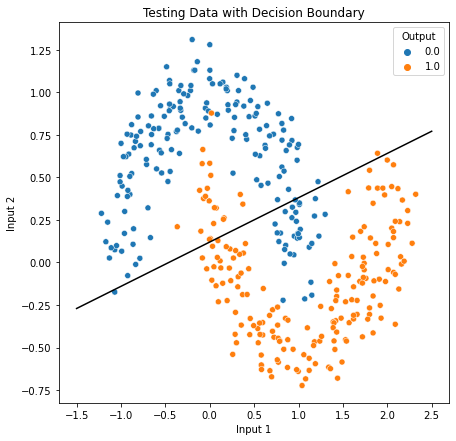

In [ ]:
b = -w_b[0] / w_b[1]
xx = np.arange(-1.5, 3,.5)
yy = b * xx - (clf_b.intercept_[0]) / w_b[1]

plt.figure(figsize = (7,7))
sns.scatterplot(data=test_b,x='Input 1',y='Input 2',hue='Output')
plt.title('Testing Data with Decision Boundary')
plt.plot(xx, yy, 'k-');

As you can see, a straight line is not the best decision boundary for this type of data. In the next part, we will try polynomial feature mapping to generate more features and build the classifier on top of it.

## Problem 3, Part C: Polynomial Feature Mapping



Use Dataset B (``data_prob3_partb.csv``) for this part of the question.


Generate more features for each datapoint using the following transformation.

For a datapoint $(x_1, x_2)$,
$$ (x_1, x_2) \rightarrow (x_1, x_2, x_1^2, x_2^2, x_1^3, x_2^3, ..., x_1^T, x_2^T) $$
Now, instead of giving $(x_1, x_2)$ as the input to the classifier, use the transformed data as the input to the classifier.

Generate the transformed training and testing dataset using Dataset B (``data_prob3_partb.csv``).

In [ ]:
df_c = df_b.copy()
data_c = df_c.to_numpy('float32')
for i in range(2,11):
  df_c['x_1^%s'%i] = data_c[:,0]**i
  df_c['x_2^%s'%i] = data_c[:,1]**i
data_c = df_c.to_numpy('float32')

In [ ]:
df_c = df_c[[c for c in df_c if c not in ['Output']] 
       + ['Output']]
df_c

,Input 1,Input 2,x_1^2,x_2^2,x_1^3,x_2^3,x_1^4,x_2^4,x_1^5,x_2^5,x_1^6,x_2^6,x_1^7,x_2^7,x_1^8,x_2^8,x_1^9,x_2^9,x_1^10,x_2^10,Output
0,0.95800,-0.575,0.917764,0.330625,8.792179e-01,-0.190109,8.422908e-01,0.109313,8.069146e-01,-0.062855,7.730241e-01,0.036142,7.405571e-01,-0.020781,7.094538e-01,1.194931e-02,6.796567e-01,-6.870851e-03,6.511111e-01,3.950739e-03,1.0
1,0.00799,0.140,0.000064,0.019600,5.100824e-07,0.002744,4.075558e-09,0.000384,3.256371e-11,0.000054,2.601840e-13,0.000008,2.078870e-15,0.000001,1.661017e-17,1.475789e-07,1.327153e-19,2.066105e-08,1.060395e-21,2.892547e-09,1.0
2,1.38000,-0.551,1.904400,0.303601,2.628072e+00,-0.167284,3.626739e+00,0.092174,5.004900e+00,-0.050788,6.906762e+00,0.027984,9.531332e+00,-0.015419,1.315324e+01,8.495966e-03,1.815147e+01,-4.681278e-03,2.504903e+01,2.579384e-03,1.0
3,-0.36300,0.960,0.131769,0.921600,-4.783215e-02,0.884736,1.736307e-02,0.849346,-6.302794e-03,0.815373,2.287915e-03,0.782758,-8.305130e-04,0.751447,3.014762e-04,7.213895e-01,-1.094359e-04,6.925339e-01,3.972522e-05,6.648325e-01,0.0
4,0.46000,0.701,0.211600,0.491401,9.733600e-02,0.344472,4.477456e-02,0.241475,2.059630e-02,0.169274,9.474298e-03,0.118661,4.358177e-03,0.083181,2.004761e-03,5.831013e-02,9.221903e-04,4.087540e-02,4.242075e-04,2.865366e-02,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-1.08000,0.290,1.166400,0.084100,-1.259712e+00,0.024389,1.360489e+00,0.007073,-1.469328e+00,0.002051,1.586875e+00,0.000595,-1.713825e+00,0.000172,1.850931e+00,5.002463e-05,-1.999005e+00,1.450714e-05,2.158926e+00,4.207071e-06,0.0
1496,-0.82400,0.934,0.678976,0.872356,-5.594762e-01,0.814781,4.610084e-01,0.761005,-3.798709e-01,0.710779,3.130136e-01,0.663867,-2.579232e-01,0.620052,2.125288e-01,5.791287e-01,-1.751237e-01,5.409062e-01,1.443019e-01,5.052064e-01,0.0
1497,-0.90000,0.506,0.810000,0.256036,-7.289999e-01,0.129554,6.560999e-01,0.065554,-5.904899e-01,0.033171,5.314409e-01,0.016784,-4.782968e-01,0.008493,4.304671e-01,4.297383e-03,-3.874204e-01,2.174475e-03,3.486784e-01,1.100285e-03,0.0
1498,-0.01650,0.385,0.000272,0.148225,-4.492125e-06,0.057067,7.412006e-08,0.021971,-1.222981e-09,0.008459,2.017919e-11,0.003257,-3.329566e-13,0.001254,5.493783e-15,4.827094e-04,-9.064743e-17,1.858431e-04,1.495683e-18,7.154960e-05,1.0


Build the logistic regression model using the transformed training data. The scikit library can be used to build the model. Bonus marks will be awarded if the model is built from scratch without using any external libraries.

In [ ]:
split_c = np.random.rand(len(df_c)) < 0.75
train_c = df_c[split]
test_c = df_c[~split]

In [ ]:
traindata_c = train_c.to_numpy(dtype='float32')
testdata_c = test_c.to_numpy(dtype='float32')

In [ ]:
#Finding weights and scores for different degrees
clf_c=[]
w_c=[]
inter_c=[]
score_c =[]
for i in range(0,8):
  cl = LogisticRegression().fit(traindata_c[:,:-(2*i+1)],traindata_c[:,-1])
  score_c.append(cl.score(testdata_c[:,:-(2*i+1)],testdata_c[:,-1]))
  inter_c.append(cl.intercept_[0])
  w_c.append(cl.coef_[0])

Try different values of $T$ (highest number of degree) between 3 to 10. Find out which value of $T$ gives the best test accuracy. Please print that values of $T$ in the below cell.

In [ ]:
for i in range(0,8):
  print(" Accuracy of Degree %d = %f"%((10-i),score_c[i]))

 Accuracy of Degree 10 = 0.959677
 Accuracy of Degree 9 = 0.959677
 Accuracy of Degree 8 = 0.959677
 Accuracy of Degree 7 = 0.959677
 Accuracy of Degree 6 = 0.959677
 Accuracy of Degree 5 = 0.959677
 Accuracy of Degree 4 = 0.956989
 Accuracy of Degree 3 = 0.954301


Print the final weights.

Increasing degree beyond 4 doesnot improve accuracy. Weights of degree 4 are given below

In [ ]:
w_c[-2]

array([-0.66920037, -5.54938317, -7.22600867,  0.41804702,  2.24354508,
       -2.00684896,  1.72861526, -0.88078493])

Print the final accuracy on transformed test data.

In [ ]:
score_c[-2]

0.956989247311828

Plot the scatter plot on test data (note that this is  the original data , not the transformed one). On top of this scatter plot, plot the new decision boundaries.

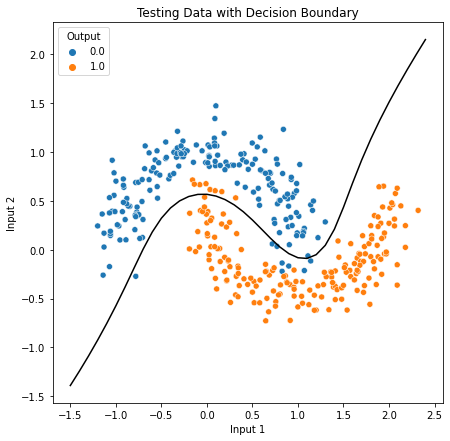

In [ ]:
#Plotting the decision boundary
xx_c = np.arange(-1.5, 2.5,0.1)
x2_c=[]
# def x2poly(x):
#   return np.poly1d([w_c[-2][1],w_c[-2][3],w_c[-2][5],w_c[-2][7],0])(x)
def x1poly(x):
  return np.poly1d([w_c[-2][6],w_c[-2][4],w_c[-2][2],w_c[-2][0],inter_c[-2]])(x)
for i in xx_c:
  x2_c.append(np.roots([w_c[-2][7],w_c[-2][5],w_c[-2][3],w_c[-2][1],x1poly(i)]))

x2_c = np.array(x2_c)[:,3]
x2_c = np.array([e.real for e in x2_c])
plt.figure(figsize = (7,7))
sns.scatterplot(data=test_c,x='Input 1',y='Input 2',hue='Output')
plt.title('Testing Data with Decision Boundary')
plt.plot(xx_c,x2_c,'k-');

## Problem 3, Part D: Multi-class Logistic Regression

## Multi-class Logistic Regression

In case of a multi-class classification problem (when the number of classes is greater than two), a **softmax function** is used instead. 
$$\text{Softmax}(\theta_{i}) = \frac{\exp(\theta_i)}{\sum_{j=1}^{N} \exp(\theta_j)}$$ where $j$ varies from $1$ to $N$ which is the number of classes and  $\theta_{i}$ is $$\theta_{i}=W_{i}*x^{(i)}+b$$ Where $x^{(i)}$ is a feature  vector of dimensions $D \times 1$ and $W_{i}$ is the $i$-th row of the weight matrix $ W$ of  dimensions $N \times D$  and $b$ is the bias having dimensions $D \times 1$.


Use Dataset D (``data_prob3_partd.csv``) for this part of the question. The given CSV file has three columns: column 1 is the first input feature, column 2 is the second input feature and column 3 is the output label. Split the dataset into training data (75%) and testing data (25%) randomly.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

csv_d = '/content/drive/MyDrive/Colab Notebooks/data_prob3_partd.csv'
with open(csv_d) as f:
  df_d = pd.read_csv(csv_d,sep=',',header=None)
df_d = df_d.drop(0).reset_index(drop=True).astype(float).rename(columns ={0:'Input 1',1:'Input 2',2:'Output'})
df_d

,Input 1,Input 2,Output
0,40.7,42.20,2.0
1,26.5,3.80,1.0
2,42.1,43.00,2.0
3,39.3,46.30,2.0
4,23.0,5.27,1.0
...,...,...,...
1495,14.4,64.80,0.0
1496,11.1,61.20,0.0
1497,31.3,18.00,1.0
1498,14.7,3.85,1.0


In [ ]:
split_d = np.random.rand(len(df_d)) < 0.75
train_d = df_d[split_d]
test_d = df_d[~split_d]

In [ ]:
traindata_d = train_d.to_numpy(dtype='float32')
testdata_d = test_d.to_numpy(dtype='float32')
traindata_d

array([[40.7 , 42.2 ,  2.  ],
       [26.5 ,  3.8 ,  1.  ],
       [42.1 , 43.  ,  2.  ],
       ...,
       [31.3 , 18.  ,  1.  ],
       [14.7 ,  3.85,  1.  ],
       [24.3 , 19.9 ,  1.  ]], dtype=float32)

Visualize the training data with a scatter plot (input feature 1 on the X axis, input feature 2 on the Y axis and color the points according to their labels).

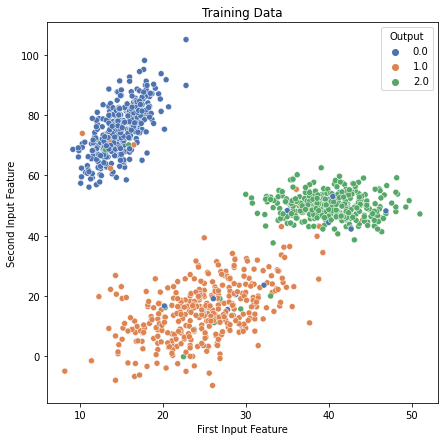

In [ ]:
plt.figure(figsize =(7,7))
p4 = sns.scatterplot(x='Input 1',y='Input 2',hue='Output',palette='deep',data=train_d);
# pd.set(xticks=np.arange(5,45,5),yticks=np.arange(0,120,20))
plt.title('Training Data')
p4.set(xlabel='First Input Feature')
p4.set(ylabel='Second Input Feature')
plt.show()

Build the logistic regression model using the training data. The scikit library can be used to build the model. Bonus marks will be awarded if the model is built from scratch without using any external libraries.

In [ ]:
clf_d = LogisticRegression().fit(traindata_d[:,0:2],traindata_d[:,2])

Print the final weights.

In [ ]:
w_d = clf_d.coef_
w_d

array([[-0.11112639,  0.05174664],
       [-0.06507653, -0.09022051],
       [ 0.17620291,  0.03847387]])

Print the final accuracy on test data.

In [ ]:
clf_d.score(testdata_d[:,0:2],testdata_d[:,2])

0.9428571428571428

Plot the scatter plot on test data. On top of this scatter plot, plot the decision boundaries.

In [ ]:
test_d['Pred Output'] = clf_d.predict(testdata_d[:,0:2]);
test_d

,Input 1,Input 2,Output,Pred Output
4,23.0,5.27,1.0,1.0
5,15.9,88.30,0.0,0.0
8,38.8,55.50,2.0,2.0
9,40.6,50.90,2.0,2.0
11,39.0,54.60,2.0,2.0
...,...,...,...,...
1482,34.0,52.80,2.0,2.0
1486,16.0,76.00,0.0,0.0
1488,19.5,94.40,0.0,0.0
1493,15.6,87.90,0.0,0.0


In [ ]:
w_db=[]
inte=[]
for i in range(2):
  w_db.append(w_d[i]/np.sqrt(w_d[i,0]**2+w_d[i,1]**2)-w_d[i+1]/np.sqrt(w_d[i+1,0]**2+w_d[i+1,1]**2))
  inte.append(clf_d.intercept_[i]/np.sqrt(w_d[i,0]**2+w_d[i,1]**2)-clf_d.intercept_[i+1]/np.sqrt(w_d[i+1,0]**2+w_d[i+1,1]**2))
w_db.append(w_d[0]/np.sqrt(w_d[0,0]**2+w_d[0,1]**2)-w_d[2]/np.sqrt(w_d[2,0]**2+w_d[2,1]**2))
inte.append(clf_d.intercept_[0]/np.sqrt(w_d[0,0]**2+w_d[0,1]**2)-clf_d.intercept_[2]/np.sqrt(w_d[2,0]**2+w_d[2,1]**2))
w_db = np.array(w_db)
inte = np.array(inte)

In [ ]:
intersec = np.linalg.solve(w_db[:2,],-inte[:2])
intersec

array([26.86942347, 48.16053742])

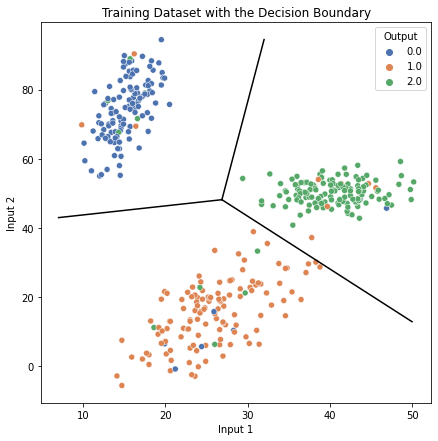

In [ ]:
xx_d1 = np.linspace(7,intersec[0],20)
xx_d2 = np.linspace(intersec[0],50,20)
xx_d3 = np.linspace(intersec[0],32,20)
yy_db1 = (-w_db[0,0] * xx_d1 - inte[0]) / w_db[0,1]
yy_db2 = (-w_db[1,0] * xx_d2 - inte[1]) / w_db[1,1]
yy_db3 = (-w_db[2,0] * xx_d3 - inte[2]) / w_db[2,1]
# yy_d1 = a_d[0]*xx_d - clf_d.intercept_[0]/w_d[0,1]
# yy_d2 = a_d[1]*xx_d - clf_d.intercept_[1]/w_d[1,1]
# yy_d3 = a_d[2]*xx_d - clf_d.intercept_[2]/w_d[2,1]

plt.figure(figsize = (7,7))
sns.scatterplot(data=test_d,x='Input 1',y='Input 2',palette='deep',hue='Output')
plt.title('Training Dataset with the Decision Boundary')
# sns.scatterplot(data=test_d,x='Input 1',y='Input 2',style='Pred Output',hue='Pred Output',alpha=0.5,s=100)
plt.plot(xx_d1, yy_db1, 'k-');
plt.plot(xx_d2, yy_db2, 'k-');
plt.plot(xx_d3, yy_db3, 'k-');
# plt.plot(xx_d, yy_d1);
# plt.plot(xx_d, yy_d2);
# plt.plot(xx_d, yy_d3);


# Problem 4: Learning on real world datasets

*Cric_data.csv* contains the batting averages and bowling averages of various cricket players along with their role in the team (Bowler/Batsman/Allrounder). The task is to predict the player role based on their batting and bowling averages.

In the next CodeWrite cell, extract the required columns from the csv file, partition the data into training (75%) and testing (25%) data randomly.  

In [ ]:
#Importing Required Libraries

from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

In [ ]:
# Extract data and partition

inp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cric_data.csv', usecols=['Batting Average', 'Bowling Average', 'Player Class'])

inp

,Batting Average,Bowling Average,Player Class
0,28.20,30.17,0
1,24.27,27.54,0
2,28.87,28.25,0
3,28.00,45.60,0
4,21.37,24.36,0
...,...,...,...
1267,12.57,29.37,1
1268,11.86,31.28,1
1269,11.26,40.69,1
1270,8.39,31.22,1


In [ ]:
#Splitting into training and testing
split_4 = np.random.rand(len(inp)) < 0.75
train_4 = inp[split_4]
test_4 = inp[~split_4]
#Arrays of the split dataframes
Cric_train = train_4.values
Cric_test = test_4.values

In [ ]:
#Count of players in different classes
count_1 = train_4.value_counts('Player Class')[1]
count_m1 = train_4.value_counts('Player Class')[-1]
count_0 = train_4.value_counts('Player Class')[0]

In [ ]:
#defining gaussian funcition
def gaussian1(x, mu, sig):
    return np.exp(-0.5*np.matmul(np.matmul((x - mu),np.linalg.inv(sig)),(x - mu).T))

**Binary Classification:**

Derive the classifiers under the assumptions below, and use ML estimators to compute and return the results on the test set. *Consider only batsmen and bowlers in this part*.

Let random variable $\underline X$ represent (Batting Average, Bowling Average) of a player whose role is a random variable $Y$.

1a) Linear Predictor: Assume $\underline X|Y=Batsman \sim \mathcal{N}(\underline {\mu_-}, I)$ and  $X|Y=Bowler \sim \mathcal{N}(\underline {\mu_+}, I)$. 

1b) Bayes Classifier: Assume $\underline X|Y=Batsman \sim \mathcal{N}(\underline {\mu_-}, \Sigma_-)$ and  $X|Y=Bowler \sim \mathcal{N}(\underline {\mu_+}, \Sigma_+)$. 

In [ ]:
#x_1 and x_m1 are the arrays for 1 and -1
#similarly mu_1 is the mean of x_1
#sig_1 and sig_m1 are the covariance matrices

def Lin_clsf_1a(X_train, Y_train, X_test):
    """ Give prediction for test data using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,2)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,2)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)

    """
    x_1  = X_train[np.where(Y_train == 1)]
    x_m1 = X_train[np.where(Y_train == -1)]

    mu_1 = (1/count_1)*(np.sum(x_1,axis=0)).reshape(1,2)
    mu_m1 = (1/count_m1)*(np.sum(x_m1,axis=0)).reshape(1,2)

    P_1 = count_1/(count_1+count_m1)
    P_m1 = count_m1/(count_1+count_m1)

    sig = np.identity(2)
    Y_test_pred=[]
    for i in range(len(X_test)):
      if gaussian1(X_test[i],mu_1,sig)*P_1 >= gaussian1(X_test[i],mu_m1,sig)*P_m1:
        Y_test_pred.append(1)
      else:
        Y_test_pred.append(-1)
    return np.array(Y_test_pred)

def Bayes_clsf_1b(X_train, Y_train, X_test):
    """ Give prediction for test data using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,2)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,2)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)

    """
    x_1  = X_train[np.where(Y_train == 1)]
    x_m1 = X_train[np.where(Y_train == -1)]

    mu_1 = (1/count_1)*(np.sum(x_1,axis=0)).reshape(1,2)
    mu_m1 = (1/count_m1)*(np.sum(x_m1,axis=0)).reshape(1,2)

    sig_1 = np.cov(X_train[np.where(Y_train == 1)].T)
    sig_m1 = np.cov(X_train[np.where(Y_train == -1)].T)

    P_1 = count_1/(count_1+count_m1)
    P_m1 = count_m1/(count_1+count_m1)
    
    Y_test_pred=[]
    for i in range(len(X_test)):
      if gaussian1(X_test[i].reshape(1,2),mu_1,sig_1)*P_1 > gaussian1(X_test[i].reshape(1,2),mu_m1,sig_m1)*P_m1:
        Y_test_pred.append(1)
      else:
        Y_test_pred.append(-1)
    return np.array(Y_test_pred)
    

In [ ]:
test_pred_lin = Lin_clsf_1a(Cric_train[:,:2],Cric_train[:,2],Cric_test[:,:2])
test_pred_bayes = Bayes_clsf_1b(Cric_train[:,:2],Cric_train[:,2],Cric_test[:,:2])

In [ ]:
clf_4 = GaussianNB().fit(Cric_train[np.where(Cric_train[:,2] != 0)][:,:2],Cric_train[np.where(Cric_train[:,2] != 0)][:,2])
test_4['sklearn Bayes']=clf_4.predict(Cric_test[:,:2])

In [ ]:
test_4['Lin Pred Class'] = test_pred_lin
test_4['Bayes Pred Class'] = test_pred_bayes
test_4

,Batting Average,Bowling Average,Player Class,sklearn Bayes,Lin Pred Class,Bayes Pred Class
10,18.59,24.77,0,1.0,1,1
12,27.42,26.11,0,1.0,1,-1
15,42.20,36.00,0,-1.0,-1,-1
17,15.61,33.40,0,1.0,1,1
20,39.53,32.08,0,-1.0,-1,-1
...,...,...,...,...,...,...
1255,13.17,26.96,1,1.0,1,1
1256,15.24,28.06,1,1.0,1,1
1257,6.67,24.96,1,1.0,1,1
1258,9.77,35.27,1,1.0,1,1


Text(0.5, 1.0, 'skLearn Gaussian Naive-Bayes Predictor')

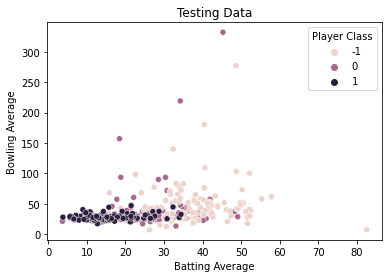

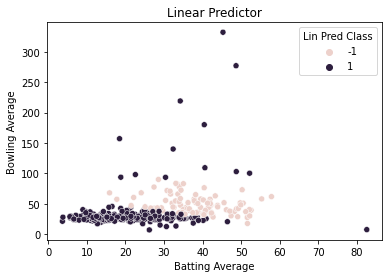

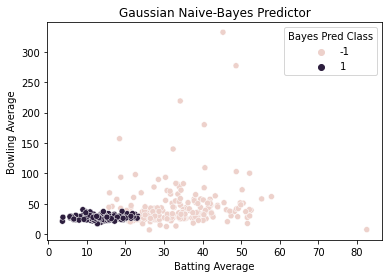

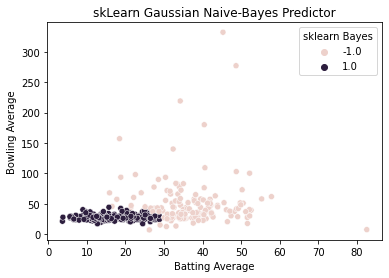

In [ ]:
plt.figure()
sns.scatterplot(data=test_4,x='Batting Average',y='Bowling Average',hue='Player Class');
plt.title('Testing Data')
plt.figure()
sns.scatterplot(data=test_4,x='Batting Average',y='Bowling Average',hue='Lin Pred Class');
plt.title('Linear Predictor')
# plt.figure()
# sns.scatterplot(data=train_4,x='Batting Average',y='Bowling Average',hue='Player Class');
plt.figure()
sns.scatterplot(data=test_4,x='Batting Average',y='Bowling Average',hue='Bayes Pred Class');
plt.title('Gaussian Naive-Bayes Predictor')
plt.figure()
sns.scatterplot(data=test_4,x='Batting Average',y='Bowling Average',hue='sklearn Bayes');
plt.title('skLearn Gaussian Naive-Bayes Predictor')

**Multi-class Classification:**

Derive the classifiers under the assumptions below, and use ML estimators to compute and return the results on the test set. *Consider batsmen, bowlers and allrounders in this part*.

Let random variable $\underline X$ represent (Batting Average, Bowling Average) of a player whose role is a random variable $Y$.

The $3\times 3$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below. (Ordering: Batsman - Allrounder - Bowler)

$L=\begin{bmatrix} 0 &1 & 2\\ 1 &0 & 1\\ 2 &1 & 0\end{bmatrix}$ 

2a) Linear Predictor: Assume $\underline X|Y=a \sim \mathcal{N}(\underline {\mu_a}, I)$

2b) Bayes Classifier: Assume $\underline X|Y=a \sim \mathcal{N}(\underline {\mu_a}, \Sigma_a)$

In [ ]:
L = np.array([0,1,2,1,0,1,2,1,0]).reshape((3,3))
L

array([[0, 1, 2],
       [1, 0, 1],
       [2, 1, 0]])

In [ ]:
def Lin_clsf_2a(X_train, Y_train, X_test):
    """ Give prediction for test data using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,2)
    Y_train: +1/0/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,2)

    Returns:
    Y_test_pred : +1/0/-1 numpy array of shape (m,)

    """
    x_1  = X_train[np.where(Y_train == 1)]
    x_m1 = X_train[np.where(Y_train == -1)]
    x_0 = X_train[np.where(Y_train == 0)]

    mu_1 = (1/count_1)*(np.sum(x_1,axis=0)).reshape(1,2)
    mu_m1 = (1/count_m1)*(np.sum(x_m1,axis=0)).reshape(1,2)
    mu_0 = (1/count_0)*(np.sum(x_0,axis=0)).reshape(1,2)

    P_1 = count_1/(count_1+count_m1+count_0)
    P_m1 = count_m1/(count_1+count_m1+count_0)
    P_0 = count_0/(count_1+count_m1+count_0)

    sig = np.identity(2)
    Y_test_pred=[]
    
    for i in range(len(X_test)):
      R_m1 = L[0,0]*gaussian1(X_test[i],mu_m1,sig)*P_m1+L[1,0]*gaussian1(X_test[i],mu_0,sig)*P_0+L[2,0]*gaussian1(X_test[i],mu_1,sig)*P_1
      R_0 = L[0,1]*gaussian1(X_test[i],mu_m1,sig)*P_m1+L[1,1]*gaussian1(X_test[i],mu_0,sig)*P_0+L[2,1]*gaussian1(X_test[i],mu_1,sig)*P_1
      R_1 = L[0,2]*gaussian1(X_test[i],mu_m1,sig)*P_m1+L[1,2]*gaussian1(X_test[i],mu_0,sig)*P_0+L[2,2]*gaussian1(X_test[i],mu_1,sig)*P_1
      if R_1 < R_m1 and R_1 < R_0:
        Y_test_pred.append(1)
      elif R_0 < R_m1 and R_0 < R_1:
        Y_test_pred.append(0)
      else:
        Y_test_pred.append(-1)
    return np.array(Y_test_pred)


def Bayes_clsf_2b(X_train, Y_train, X_test):
    """ Give prediction for test data using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,2)
    Y_train: +1/0/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,2)

    Returns:
    Y_test_pred : +1/0/-1 numpy array of shape (m,)

    """
    x_1  = X_train[np.where(Y_train == 1)]
    x_m1 = X_train[np.where(Y_train == -1)]
    x_0 = X_train[np.where(Y_train == 0)]

    mu_1 = (1/count_1)*(np.sum(x_1,axis=0)).reshape(1,2)
    mu_m1 = (1/count_m1)*(np.sum(x_m1,axis=0)).reshape(1,2)
    mu_0 = (1/count_0)*(np.sum(x_0,axis=0)).reshape(1,2)

    sig_1 = np.cov(X_train[np.where(Y_train == 1)].T)
    sig_m1 = np.cov(X_train[np.where(Y_train == -1)].T)
    sig_0 = np.cov(X_train[np.where(Y_train == 0)].T)

    P_1 = count_1/(count_1+count_m1+count_0)
    P_m1 = count_m1/(count_1+count_m1+count_0)
    P_0 = count_0/(count_1+count_m1+count_0)

    Y_test_pred=[]
    for i in range(len(X_test)):
      R_m1 = L[0,0]*gaussian1(X_test[i].reshape(1,2),mu_m1,sig_m1)*P_m1+L[1,0]*gaussian1(X_test[i].reshape(1,2),mu_0,sig_0)*P_0+L[2,0]*gaussian1(X_test[i].reshape(1,2),mu_1,sig_1)*P_1
      R_0 = L[0,1]*gaussian1(X_test[i].reshape(1,2),mu_m1,sig_m1)*P_m1+L[1,1]*gaussian1(X_test[i].reshape(1,2),mu_0,sig_0)*P_0+L[2,1]*gaussian1(X_test[i].reshape(1,2),mu_1,sig_1)*P_1
      R_1 = L[0,2]*gaussian1(X_test[i].reshape(1,2),mu_m1,sig_m1)*P_m1+L[1,2]*gaussian1(X_test[i].reshape(1,2),mu_0,sig_0)*P_0+L[2,2]*gaussian1(X_test[i].reshape(1,2),mu_1,sig_1)*P_1
      if R_1 < R_m1 and R_1 < R_0:
        Y_test_pred.append(1)
      elif R_0 < R_m1 and R_0 < R_1:
        Y_test_pred.append(0)
      else:
        Y_test_pred.append(-1)
    return np.array(Y_test_pred)

In [ ]:
multi_lin_pred = Lin_clsf_2a(Cric_train[:,:2],Cric_train[:,2],Cric_test[:,:2])
multi_bayes_pred = Bayes_clsf_2b(Cric_train[:,:2],Cric_train[:,2],Cric_test[:,:2])
test_4['Multi Lin Pred'] = multi_lin_pred
test_4['Multi Bayes Pred'] = multi_bayes_pred
test_4

,Batting Average,Bowling Average,Player Class,sklearn Bayes,Lin Pred Class,Bayes Pred Class,Multi Lin Pred,Multi Bayes Pred
10,18.59,24.77,0,1.0,1,1,1,0
12,27.42,26.11,0,1.0,1,-1,0,0
15,42.20,36.00,0,-1.0,-1,-1,0,-1
17,15.61,33.40,0,1.0,1,1,1,1
20,39.53,32.08,0,-1.0,-1,-1,0,-1
...,...,...,...,...,...,...,...,...
1255,13.17,26.96,1,1.0,1,1,1,1
1256,15.24,28.06,1,1.0,1,1,1,1
1257,6.67,24.96,1,1.0,1,1,1,1
1258,9.77,35.27,1,1.0,1,1,1,1


In [ ]:
err_rate=np.zeros(5)
err_rate[0] = len(np.where(test_4['sklearn Bayes'] != test_4['Player Class'])[0])/len(test_4['Player Class'])
err_rate[1] = len(np.where(test_4['Lin Pred Class'] != test_4['Player Class'])[0])/len(test_4['Player Class'])
err_rate[2] = len(np.where(test_4['Bayes Pred Class'] != test_4['Player Class'])[0])/len(test_4['Player Class'])
err_rate[3] = len(np.where(test_4['Multi Lin Pred'] != test_4['Player Class'])[0])/len(test_4['Player Class'])
err_rate[4] = len(np.where(test_4['Multi Bayes Pred'] != test_4['Player Class'])[0])/len(test_4['Player Class'])

# len(np.where(test_4['sklearn Bayes'] != test_4['Player Class'])[0])

**Plots:**

In the next CodeWrite cell, plot all the 4 classifiers on a 2d plot. Take a suitable grid covering averages (0,60) in both dimensions. (Color the different classes accordingly). Add the training data points also on the plot. Label the plots appropriately. 

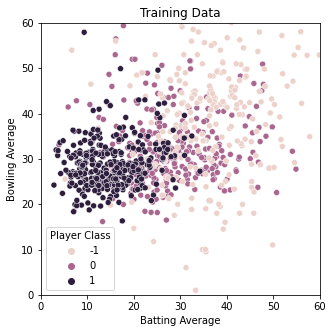

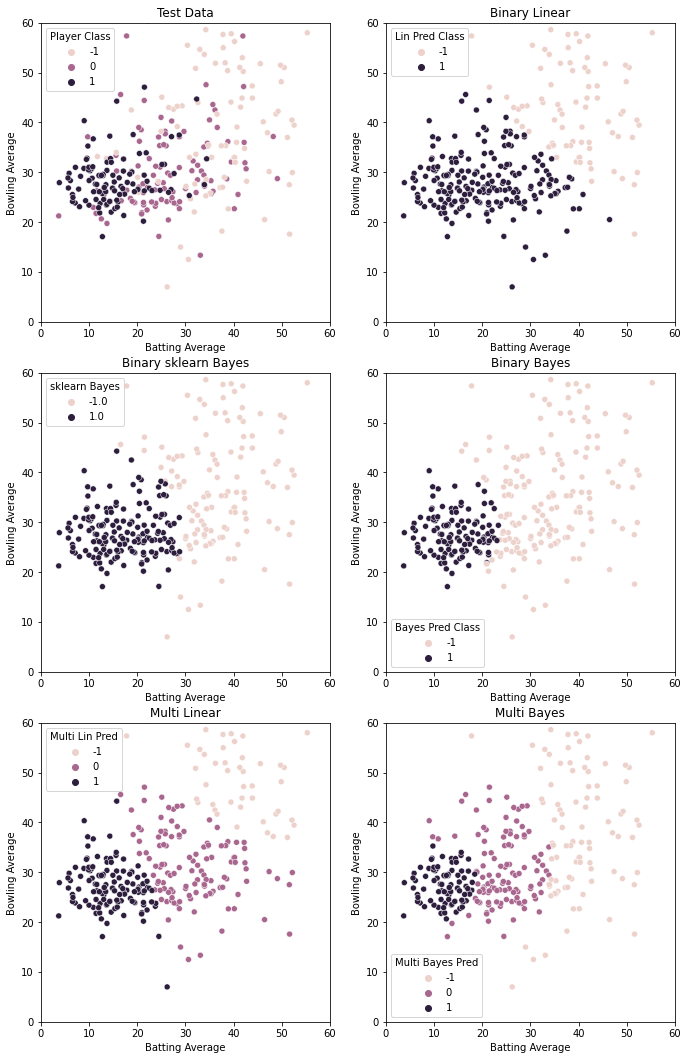

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=train_4,x='Batting Average',y='Bowling Average',hue='Player Class')
plt.title('Training Data')
plt.xlim(0,60)
plt.ylim(0,60)

fig,a = plt.subplots(3,2,figsize=(10,15))
plt.setp(a, xlim=(0,60), ylim=(0,60))
plt.tight_layout(pad=3.0)

a[0][0].set_title('Test Data')
a[0][1].set_title('Binary Linear')
a[1][0].set_title('Binary sklearn Bayes')
a[1][1].set_title('Binary Bayes')
a[2][0].set_title('Multi Linear')
a[2][1].set_title('Multi Bayes')

sns.scatterplot(data=test_4,x='Batting Average',y='Bowling Average',hue='Player Class',ax=a[0][0])
sns.scatterplot(data=test_4,x='Batting Average',y='Bowling Average',hue='Lin Pred Class',ax=a[0][1])
sns.scatterplot(data=test_4,x='Batting Average',y='Bowling Average',hue='sklearn Bayes',ax=a[1][0])
sns.scatterplot(data=test_4,x='Batting Average',y='Bowling Average',hue='Bayes Pred Class',ax=a[1][1])
sns.scatterplot(data=test_4,x='Batting Average',y='Bowling Average',hue='Multi Lin Pred',ax=a[2][0])
sns.scatterplot(data=test_4,x='Batting Average',y='Bowling Average',hue='Multi Bayes Pred',ax=a[2][1]);


In [ ]:
print('Error Rates :\n')
print('Binary skLearn: ',err_rate[0])
print('Binary Linear:  ',err_rate[1])
print('Binary Bayes:   ',err_rate[2])
print('Multi Linear:   ',err_rate[3])
print('Multi Bayes:    ',err_rate[4])

Error Rates :

Binary skLearn:  0.39751552795031053
Binary Linear:   0.46273291925465837
Binary Bayes:    0.41304347826086957
Multi Linear:    0.3447204968944099
Multi Bayes:     0.3105590062111801


**Observations:**

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the four learnt classifiers, and also give the error rate of the four classifiers as a 2x2 table.

**Linear Predictor**: For linear predictor of binary classification, we can clearly observe a linear decision boundary between classes. In case of the multiple classes, the decision boundary shows slight deviation from the linear curve due to the inclusion of the loss matrix.

**Bayes Predictor** : Comparing with a linear predictor, in this case we have a decision boundary marked by intersection of the 2 gaussian curves in the binary case. In the multi class case, due to inclusion of loss matrix we have slightly more complicated decision boundary. skLearn's Naive Bayes algorithm is more complicated (inclusion of variance smoothing and other algorithms) and thus has different result compared to the implemented Bayes Predictor.


Error rate for classification is defined as \\
Error Rate = $\frac{N_{errors}}{N_{data}}$


In [ ]:
err_df = pd.DataFrame({'Linear': [err_rate[1],err_rate[3]],'Bayes': [err_rate[2],err_rate[4]]},index=['Binary','Multi'])
err_df

,Linear,Bayes
Binary,0.462733,0.413043
Multi,0.344720,0.310559


We can observe that the error of Bayes Predictor is less than Linear in both binary and multi class classification.